## Author: Technocolabs Sofwares
## Credit: Mahmoud Yaser Salman
## Programmed: Spotify Recommendation System Project 

<hr>

<center> <h1> Task 1 Model Answer: Feature Engineering </h1> </center>

<hr>

<hr>

## Import Packages

In [1]:
import pandas as pd
# Import Pandas to use DataFrames
import swifter
# To efficiently apply any function to a Pandas Data Frame or Series object in the quickest available method
import numpy as np
# Import Numpy which will hel in mathematical calculations 
import matplotlib.pyplot as plt
import seaborn as sns
# To Visualize Data
import json
# To Read Json Files
import os
# To Access system files/options
import glob
# To return all file paths that match a specific pattern
from tqdm import tqdm
# To Display progress when using loops

#-----------------------------------------------------------------------

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# To make feature extraction from spotify app

#-----------------------------------------------------------------------

import statsmodels
import sklearn
# To perform Statistical Analysis 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA # Import the PCA class function from sklearn
from scipy import stats
from sklearn import preprocessing




pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
# Tune some options in pandas 


%matplotlib inline
# To make any plot appear in jupyter notebook

## Import our dataset

In [2]:
DATASETS_PATH = 'C:\My Data\iTi AI i.42\Internship\Technocolabs Data Analysis\DA\Spotify-Recommendation-System' # change to the path of your csv file
df_modified = pd.read_csv(os.path.join(DATASETS_PATH, 'feature_engineering_dataset.csv'))

In [3]:
df_modified

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,28,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,235080,Love Is A Four Letter Word,0.65,0.63,7,-7.16,1,0.02,4.83e-02,0.00e+00,0.12,0.70,84.14,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,248,79,1
266359,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,36,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,288106,Galore - The Singles 1987-1997,0.46,0.74,9,-6.10,1,0.03,4.48e-03,1.02e-02,0.12,0.63,172.72,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,https://api.spotify.com/v1/audio-analysis/6DW7...,4,79,1,1
266360,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,37,The Cure

# Create New Features by Features Interaction

**I conducted sentiment analysis finding the polarity and subjectivity of the track name.**

- Subjectivity (0,1): The amount of personal opinion and factual information contained in the text.
- Polarity (-1,1): The degree of strong or clearly defined sentiment accounting for negation.
    
"The goal of the sentiment analysis is to extract additional features from the tracks.
By doing so, we can extract sentiment data other audio features via textual information.
For example, if the general mood of the song titles of a playlist is positive,
then this can be utilized to recommend positive songs. However, due to the short length of the titles,
the two metrics cannot produce optimal results."

In [4]:
df_add = df_modified.copy()

## One Hot Encoding Manually  

In [5]:
happy_yes = df_add['valence'].copy()
happy_yes[df_add['valence']>=0.5] = 1
happy_yes[df_add['valence']<0.5] = 0
happy_yes.name = "happy_yes"
happy_yes

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
266358    1.0
266359    1.0
266360    1.0
266361    1.0
266362    0.0
Name: happy_yes, Length: 266363, dtype: float64

In [6]:
happy_no = df_add['valence'].copy()
happy_no[df_add['valence'] >= 0.5] = 0
happy_no[df_add['valence'] < 0.5] = 1
happy_no.name = "happy_no"
happy_no

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
266358    0.0
266359    0.0
266360    0.0
266361    0.0
266362    1.0
Name: happy_no, Length: 266363, dtype: float64

In [7]:
speech_yes = df_add['speechiness'].copy()
speech_yes.name = "speech_yes"
speech_yes[(df_add['speechiness']>=0.66)] = 1
speech_yes[(df_add['speechiness']<0.66)] = 0
speech_yes

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
266358    0.0
266359    0.0
266360    0.0
266361    0.0
266362    0.0
Name: speech_yes, Length: 266363, dtype: float64

In [8]:
speech_no = df_add['speechiness'].copy()
speech_no.name = "speech_no"
speech_no[(df_add['speechiness']>=0.66)] = 0
speech_no[(df_add['speechiness']<0.66)] = 1
speech_no

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
266358    1.0
266359    1.0
266360    1.0
266361    1.0
266362    1.0
Name: speech_no, Length: 266363, dtype: float64

In [9]:
collaborative_yes = df_add['collaborative'].copy()
collaborative_yes.name = "collaborative_yes"
collaborative_yes[(df_add['collaborative'] == 1)] = 1
collaborative_yes[(df_add['collaborative'] == 0)] = 0
collaborative_yes

0         0
1         0
2         0
3         0
4         0
         ..
266358    0
266359    0
266360    0
266361    0
266362    0
Name: collaborative_yes, Length: 266363, dtype: int64

In [10]:
collaborative_no = df_add['collaborative'].copy()
collaborative_no.name = "collaborative_no"
collaborative_no[(df_add['collaborative'] == 1)] = 0
collaborative_no[(df_add['collaborative'] == 0)] = 1
collaborative_no

0         1
1         1
2         1
3         1
4         1
         ..
266358    1
266359    1
266360    1
266361    1
266362    1
Name: collaborative_no, Length: 266363, dtype: int64

In [11]:
mode_yes = df_add['mode'].copy()
mode_yes.name = "mode_yes"
mode_yes[(df_add['mode']>=0.66)] = 1
mode_yes[(df_add['mode']<0.66)] = 0
mode_yes

0         0
1         0
2         0
3         0
4         0
         ..
266358    1
266359    1
266360    1
266361    1
266362    1
Name: mode_yes, Length: 266363, dtype: int64

In [12]:
mode_no = df_add['mode'].copy()
mode_no.name = "mode_no"
mode_no[(df_add['mode'] == 1)] = 0
mode_no[(df_add['mode'] == 0)] = 1
mode_no

0         1
1         1
2         1
3         1
4         1
         ..
266358    0
266359    0
266360    0
266361    0
266362    0
Name: mode_no, Length: 266363, dtype: int64

In [13]:
# We have to drop original boolean columns
df_add = df_add.drop(columns = ["collaborative", "mode"], axis = 1)
# Add all the newly created columns by ONE HOT ENCODING technique to our dataframe
df_add = pd.concat([df_add, mode_no, mode_yes, collaborative_no, collaborative_yes, speech_no, speech_yes, happy_no, happy_yes], axis=1)
df_add

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track,mode_no,mode_yes,collaborative_no,collaborative_yes,speech_no,speech_yes,happy_no,happy_yes
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21,1,0,1,0,1.0,0.0,0.0,1.0
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21,1,0,1,0,1.0,0.0,0.0,1.0
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21,1,0,1,0,1.0,0.0,0.0,1.0
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21,1,0,1,0,1.0,0.0,0.0,1.0
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21,1,0,1,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,3999,other,NaN,1420848000,17,56,97,1,9,22548683,28,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,235080,Love Is A Four Letter Word,0.65,0.63,7,-7.16,0.02,4.83e-02,0.00e+00,0.12,0.70,84.14,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,248,79,1,0,1,1,0,1.0,0.0,0.0,1.0
266359,3999,other,NaN,1420848000,17,56,97,1,9,22548683,36,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,288106,Galore - The Singles 1987-1997,0.46,0.74,9,-6.10,0.03,4.48e-03,1.02e-02,0.12,0.63,172.72,6DW7MN6DCVvTDjtcL5IM9a,s

## Get all numerical columns

In [14]:
numerical_features = (df_add.dtypes == 'int64') | (df_add.dtypes == 'float64')
numerical_columns = []
for i in range(len(numerical_features)):
    if numerical_features[i]:
        numerical_columns.append(df_add.columns[i])
# Slicing to remove the boolean columns (As they have int data type)        
numerical_columns = numerical_columns[0:24]
numerical_columns

['pid',
 'modified_at',
 'num_artists',
 'num_albums',
 'num_tracks',
 'num_followers',
 'num_edits',
 'playlist_duration_ms',
 'pos',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'playlist_followers_artist',
 'playlist_followers_album',
 'playlist_followers_track']

## Get all Boolean Columns

In [15]:
boolean_columns = ["mode_no", "mode_yes", "collaborative_no", "collaborative_yes", "speech_no", "speech_yes", "happy_no", "happy_yes"]
boolean_columns

['mode_no',
 'mode_yes',
 'collaborative_no',
 'collaborative_yes',
 'speech_no',
 'speech_yes',
 'happy_no',
 'happy_yes']

## Get Right & Left Skewed Columns

In [16]:
right_skewed = []
left_skewed = []
for i in range(len(df_add[numerical_columns].columns)):
    if (df_add[numerical_columns].skew()[i]>0):
        right_skewed.append(df_add[numerical_columns].skew().index[i])
    else:
        left_skewed.append(df_add[numerical_columns].skew().index[i])
right_skewed

['pid',
 'num_artists',
 'num_albums',
 'num_tracks',
 'num_followers',
 'num_edits',
 'playlist_duration_ms',
 'pos',
 'duration_ms',
 'key',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'playlist_followers_artist',
 'playlist_followers_album',
 'playlist_followers_track']

## Transfrom Data to Handle Skewness

In [17]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266363 entries, 0 to 266362
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   pid                        266363 non-null  int64  
 1   name                       266363 non-null  object 
 2   description                5333 non-null    object 
 3   modified_at                266363 non-null  int64  
 4   num_artists                266363 non-null  int64  
 5   num_albums                 266363 non-null  int64  
 6   num_tracks                 266363 non-null  int64  
 7   num_followers              266363 non-null  int64  
 8   num_edits                  266363 non-null  int64  
 9   playlist_duration_ms       266363 non-null  int64  
 10  pos                        266363 non-null  int64  
 11  artist_name                266363 non-null  object 
 12  track_uri                  266363 non-null  object 
 13  artist_uri                 26

In [18]:
# A function to draw the histogram of any column
def drawHist(df, column):
    fig, ax = plt.subplots()
    df[column].hist()
    ax.set_title(f"Skew Factor: {df[column].skew()}")
    ax.set_xlabel(f"{df[column].name}")
    return 0

In [19]:
# As boxcox does not accept columns whose number is equal to zero
small_number = 1e-24
# Columns transformation function  
def tarnsform_columns(df, column, p = 'pow'):
    df1 = df.copy()
    for i in range(len(df1[column].columns)):
        if abs(df1[df1[column].columns[i]]).skew() >= 0.11:
            if p == 'log':
                    df1[df1[column].columns[i]] = np.exp(df1[df1[column].columns[i]])
            elif p == 'box':
                    df1[df1[column].columns[i]] = pd.Series(stats.boxcox((df1[df1[column].columns[i]])+small_number)[0], name = df1[df1[column].columns[i]].name)
            else:
                    df1[df1[column].columns[i]] = np.log(((df1[df1[column].columns[i]])+1))
    return df1

- Before transforming we should know:
    - Power Tranformation can be applied for Left-Skewed Columns
    - Log Transformation can be applied for Right-Skewed Columns
    - Boxcox Transformation can be applied for Positive-Numbered Columns
    - If the skew factor of a column more than or equal 0.11 then we can apply transformation. other than that:
        - Transfomred column skew factor will increase  

In [20]:
df_transformed = df_add.copy()

In [21]:
# Exclude "loudness" column as it contains negative numbers
positive_columns = (left_skewed[0:3] + left_skewed[4:] + right_skewed)
df_transformed = tarnsform_columns(df_transformed, positive_columns, 'box')
df_transformed.head()

c:\Users\mido9\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track,mode_no,mode_yes,collaborative_no,collaborative_yes,speech_no,speech_yes,happy_no,happy_yes
0,0,Throwbacks,NaN,1493424000,7.85,9.65,11.61,0.00,1.94,2910.63,-4.28,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.9,0.81,4,-7.11,-1.91,-2.44,-4.84,-2.6,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0
1,123,w o r k o u t,NaN,1500681600,16.27,20.89,26.50,0.00,3.78,5821.93,7.38,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.9,0.81,4,-7.11,-1.91,-2.44,-4.84,-2.6,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0
2,218,party playlist,NaN,1504310400,11.06,13.66,16.42,0.00,1.47,3813.53,3.65,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.9,0.81,4,-7.11,-1.91,-2.44,-4.84,-2.6,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0
3,342,Dance mix,NaN,1473724800,13.37,15.91,21.75,0.00,3.06,5213.54,5.97,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.9,0.81,4,-7.11,-1.91,-2.44,-4.84,-2.6,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0
4,382,spin,NaN,1505347200,4.38,4.84,5.26,0.35,1.73,1746.51,0.00,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.9,0.81,4,-7.11,-1.91,-2.44,-4.84,-2.6,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0


0

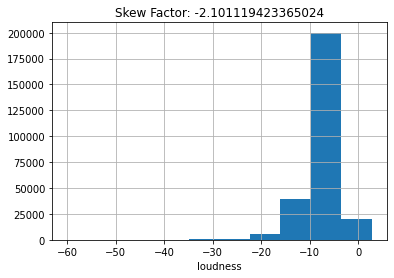

In [22]:
drawHist(df_transformed, "loudness")

We observe it is left skewed, so we apply power transform to it.

In [23]:
loudness = ["loudness"]
df_transformed = tarnsform_columns(df_transformed, loudness, 'pow')
df_transformed.head()

c:\Users\mido9\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track,mode_no,mode_yes,collaborative_no,collaborative_yes,speech_no,speech_yes,happy_no,happy_yes
0,0,Throwbacks,NaN,1493424000,7.85,9.65,11.61,0.00,1.94,2910.63,-4.28,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.9,0.81,4,NaN,-1.91,-2.44,-4.84,-2.6,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0
1,123,w o r k o u t,NaN,1500681600,16.27,20.89,26.50,0.00,3.78,5821.93,7.38,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.9,0.81,4,NaN,-1.91,-2.44,-4.84,-2.6,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0
2,218,party playlist,NaN,1504310400,11.06,13.66,16.42,0.00,1.47,3813.53,3.65,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.9,0.81,4,NaN,-1.91,-2.44,-4.84,-2.6,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0
3,342,Dance mix,NaN,1473724800,13.37,15.91,21.75,0.00,3.06,5213.54,5.97,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.9,0.81,4,NaN,-1.91,-2.44,-4.84,-2.6,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0
4,382,spin,NaN,1505347200,4.38,4.84,5.26,0.35,1.73,1746.51,0.00,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.9,0.81,4,NaN,-1.91,-2.44,-4.84,-2.6,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0


0

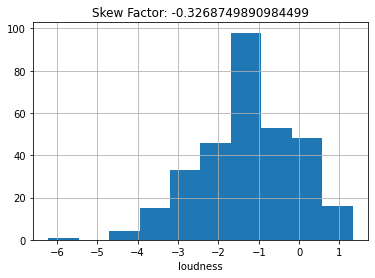

In [24]:
drawHist(df_transformed, "loudness")

<center> <strong> <h3> Before Transform Distribution </h3> </strong> </center>

C:\Users\mido9\AppData\Local\Temp\ipykernel_36040\90411200.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_modified[numerical_columns].hist(ax = ax1, bins=20)


array([[<AxesSubplot:title={'center':'pid'}>,
        <AxesSubplot:title={'center':'modified_at'}>,
        <AxesSubplot:title={'center':'num_artists'}>,
        <AxesSubplot:title={'center':'num_albums'}>,
        <AxesSubplot:title={'center':'num_tracks'}>],
       [<AxesSubplot:title={'center':'num_followers'}>,
        <AxesSubplot:title={'center':'num_edits'}>,
        <AxesSubplot:title={'center':'playlist_duration_ms'}>,
        <AxesSubplot:title={'center':'pos'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'

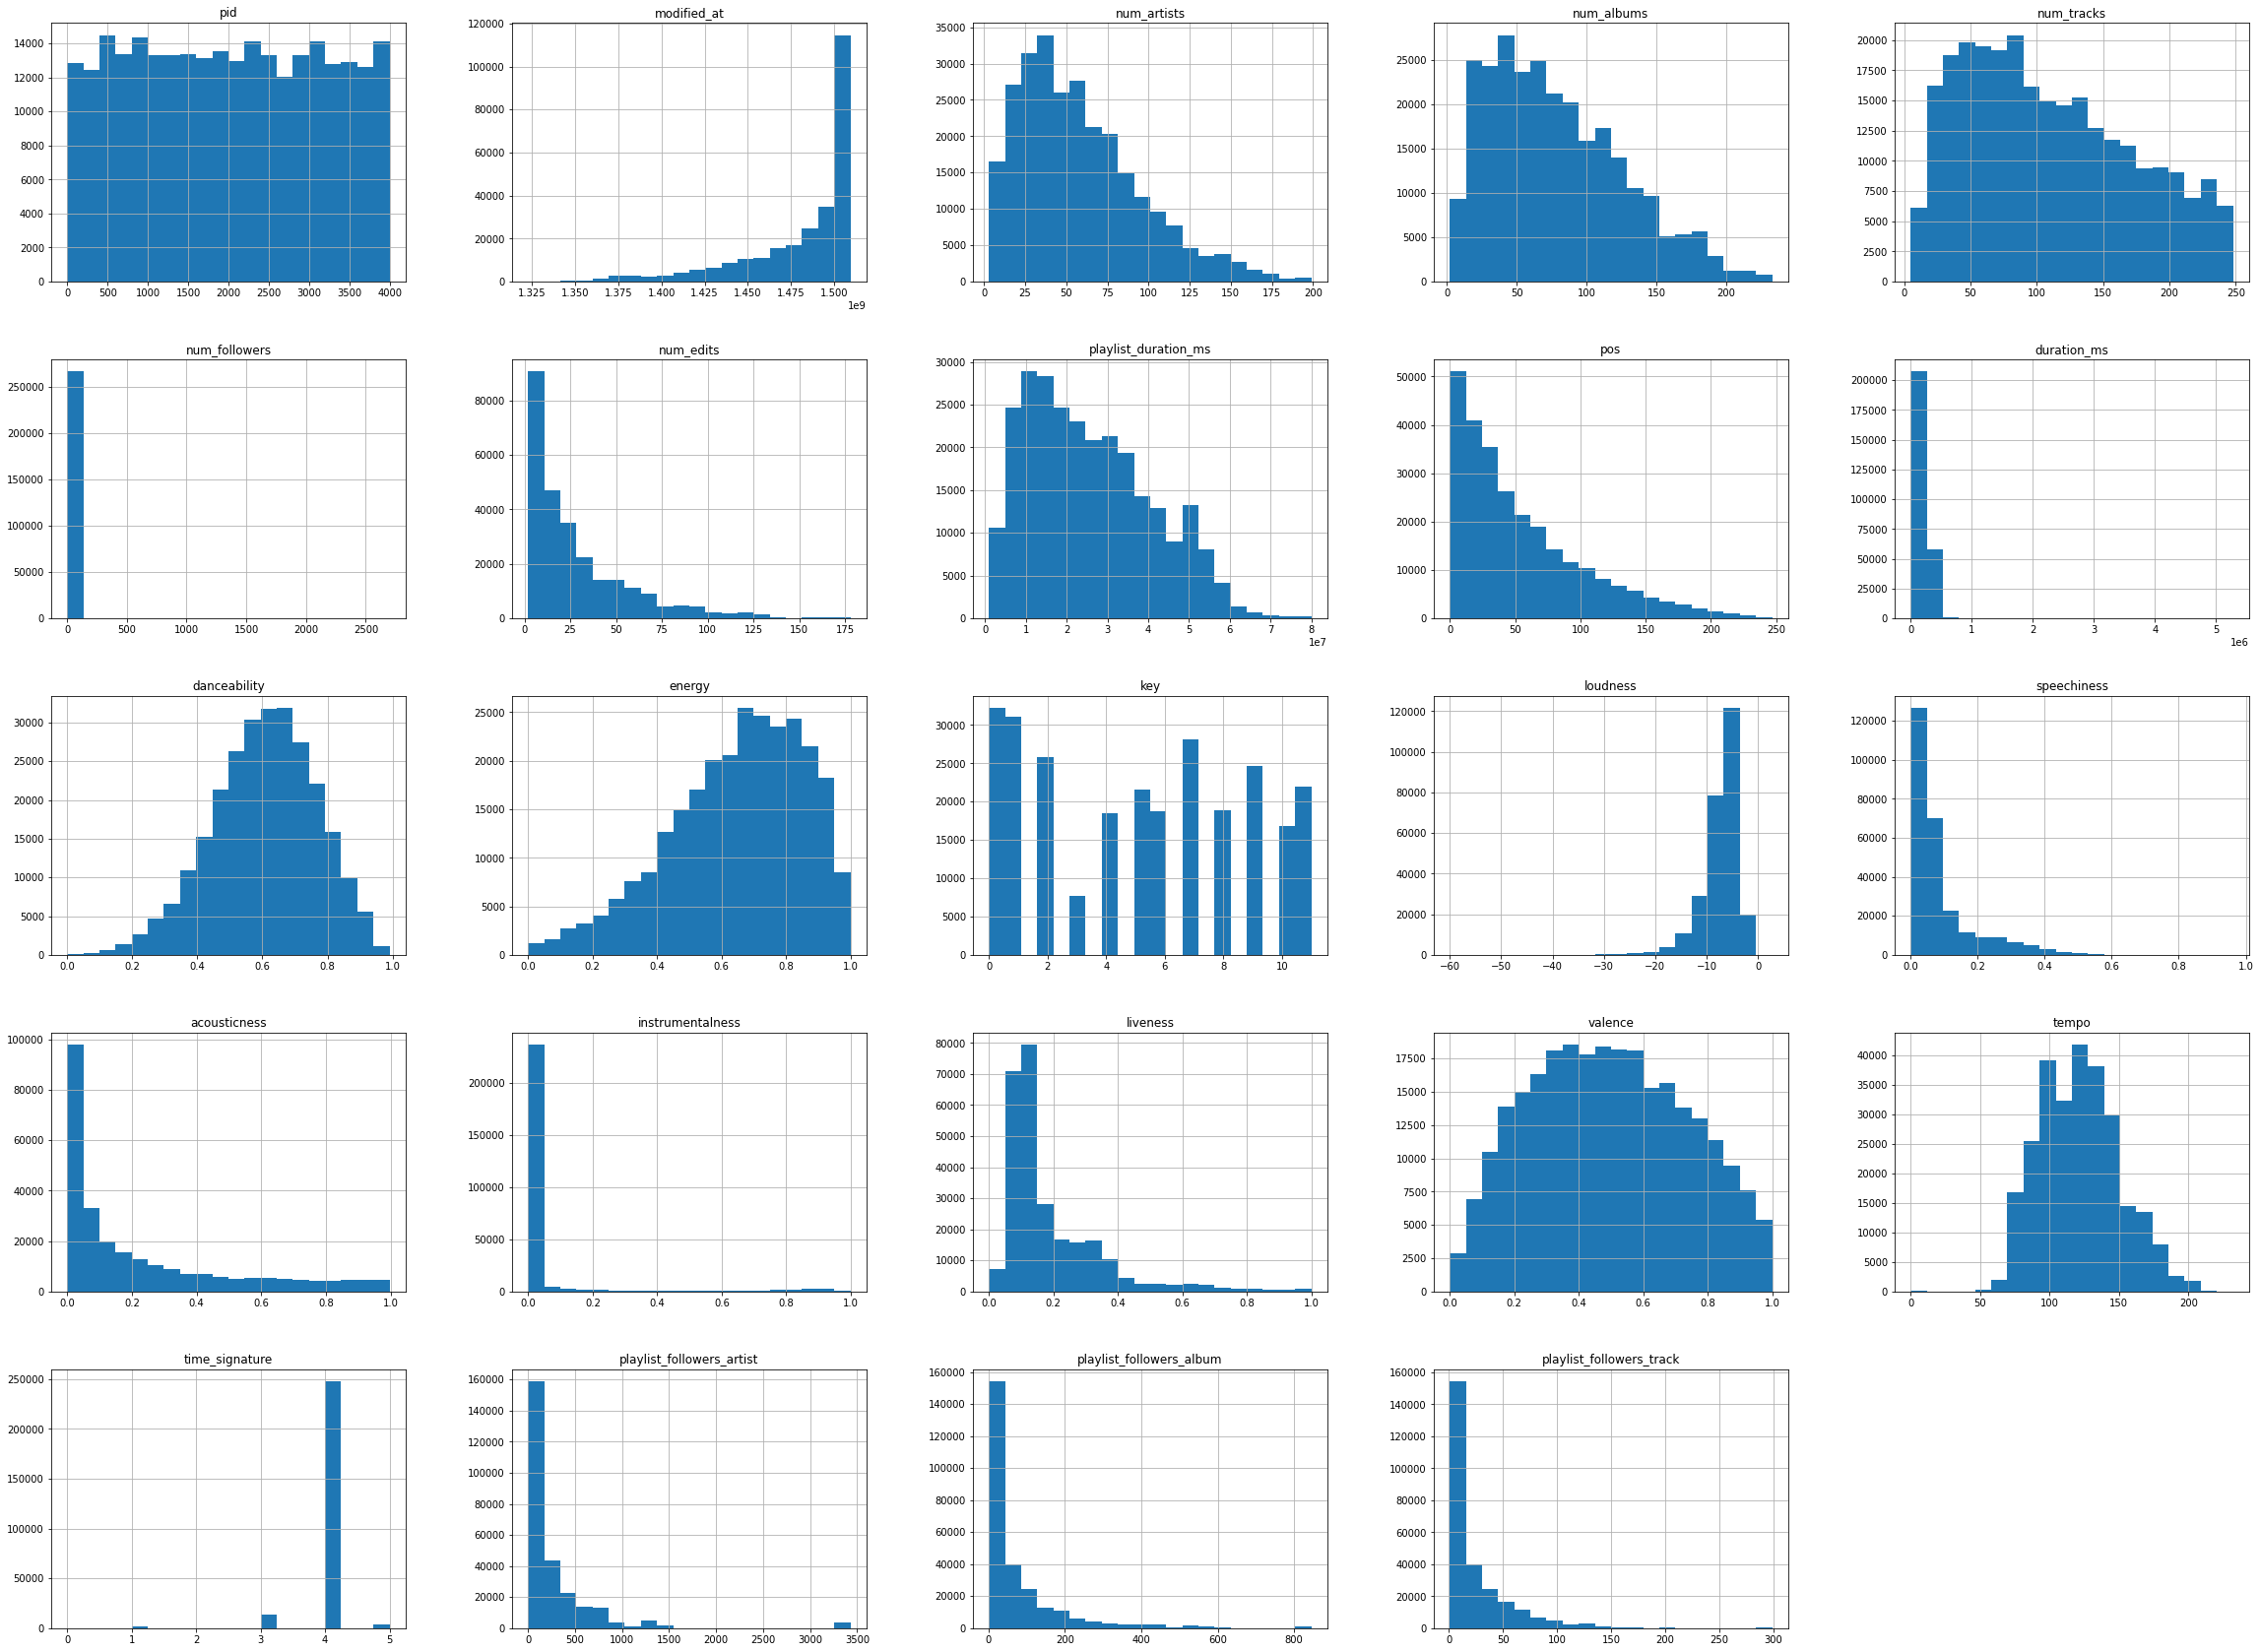

In [25]:
fig1 = plt.figure(figsize = (40,30))
ax1 = fig1.gca()
df_modified[numerical_columns].hist(ax = ax1, bins=20)

<center> <strong> <h3> After Transform Distribution </h3> </strong> </center>

C:\Users\mido9\AppData\Local\Temp\ipykernel_36040\1712650465.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_transformed[numerical_columns].hist(ax = ax2, bins=20)


array([[<AxesSubplot:title={'center':'pid'}>,
        <AxesSubplot:title={'center':'modified_at'}>,
        <AxesSubplot:title={'center':'num_artists'}>,
        <AxesSubplot:title={'center':'num_albums'}>,
        <AxesSubplot:title={'center':'num_tracks'}>],
       [<AxesSubplot:title={'center':'num_followers'}>,
        <AxesSubplot:title={'center':'num_edits'}>,
        <AxesSubplot:title={'center':'playlist_duration_ms'}>,
        <AxesSubplot:title={'center':'pos'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'

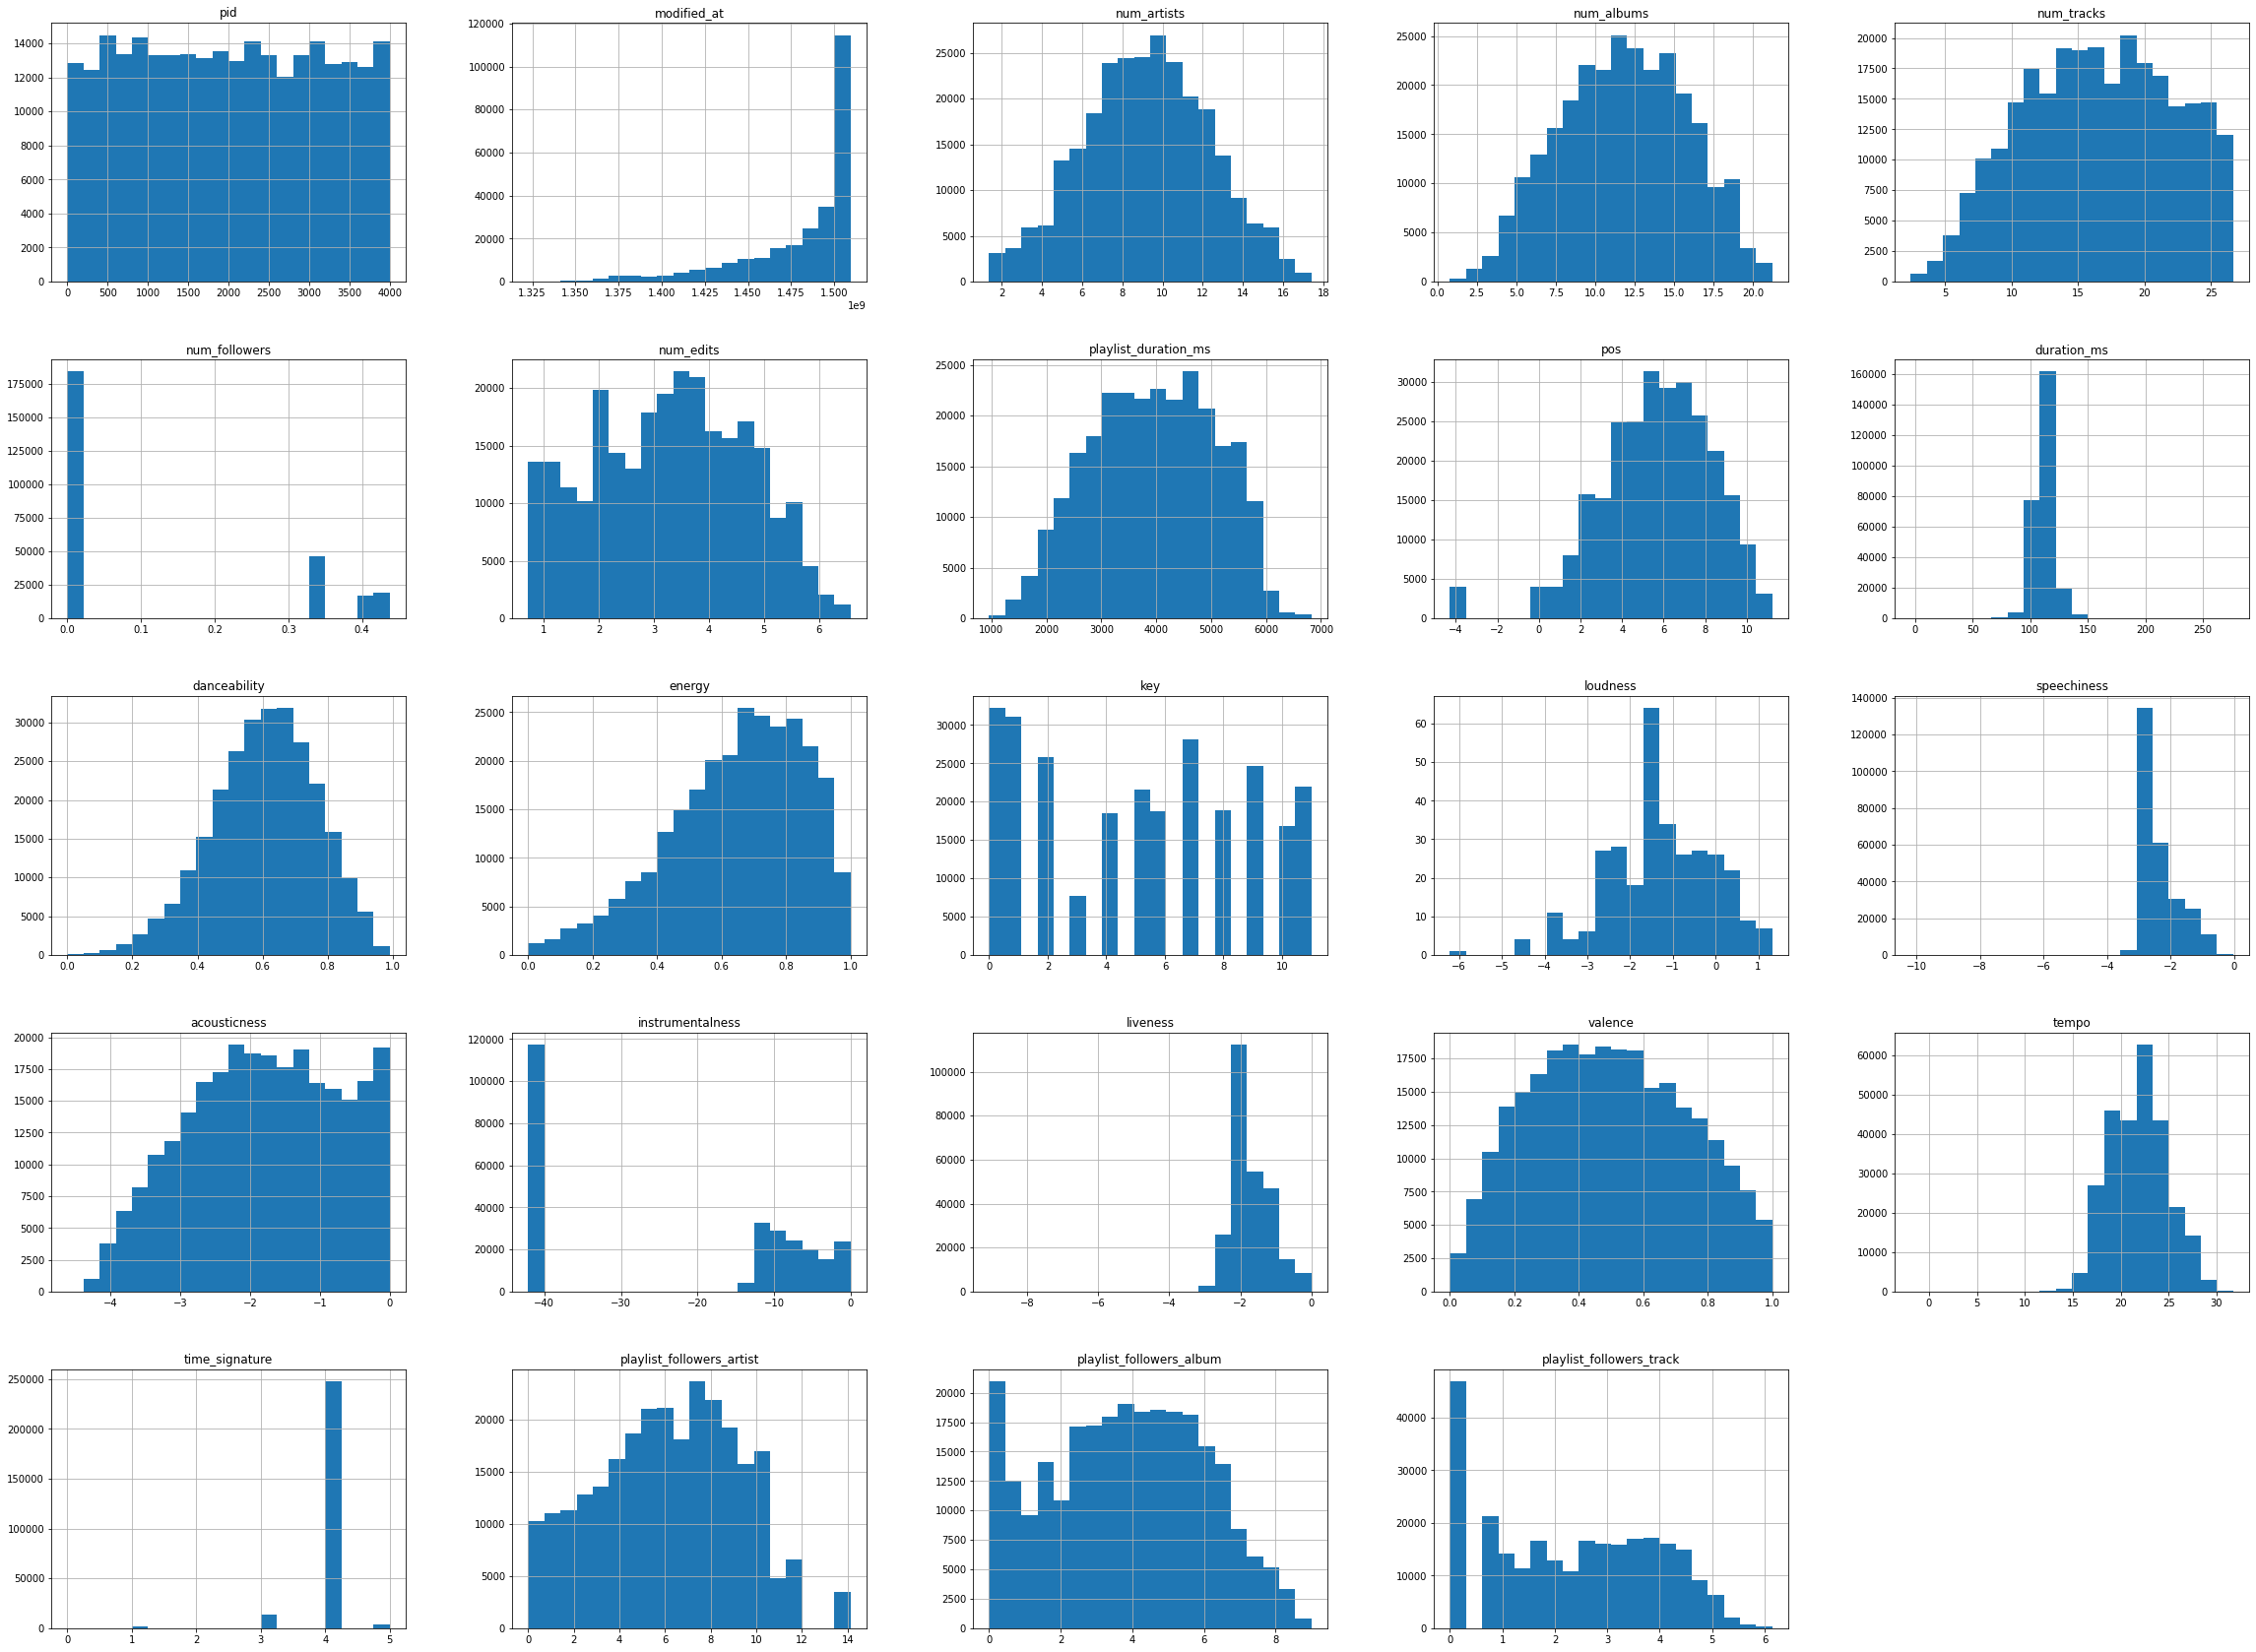

In [26]:
fig2 = plt.figure(figsize = (40,30))
ax2 = fig2.gca()
df_transformed[numerical_columns].hist(ax = ax2, bins=20)

We notice that there is a big improvement in the skewness of all our columns

## Apply Tukey’s box plot method to detect and winsorize outliers

Next to its visual benefits, the box plot provides useful statistics to identify individual observations as outliers. Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.

While the inner (often confused with the whiskers) and outer fence are usually not shown on the actual box plot, they can be calculated using the interquartile range (IQR) like this:

**IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile**

**Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]**

**Outer fence = [Q1–3*IQR, Q3+3*IQR]**

**The distribution’s inner fence is defined as 1.5 x IQR below Q1, and 1.5 x IQR above Q3. The outer fence is defined as 3 x IQR below Q1, and 3 x IQR above Q3**


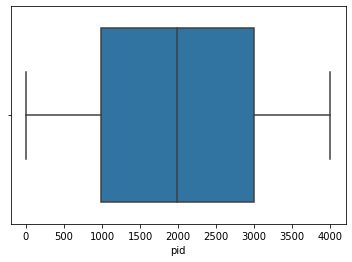

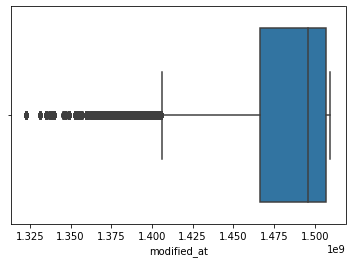

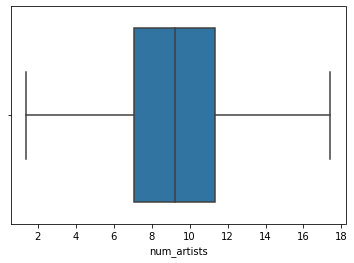

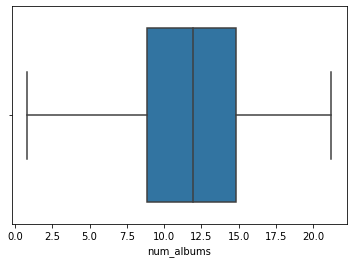

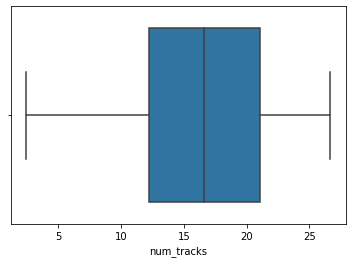

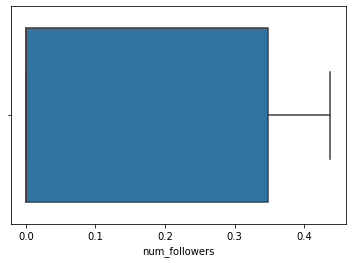

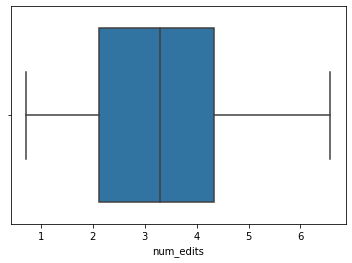

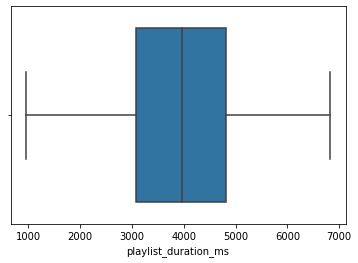

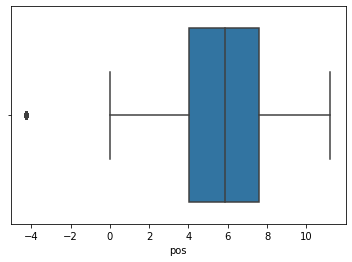

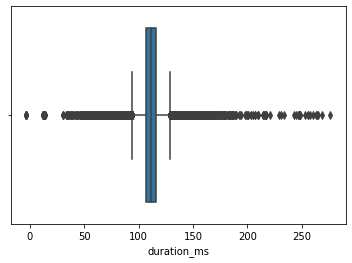

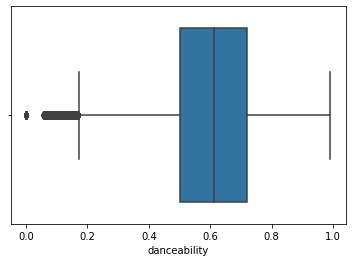

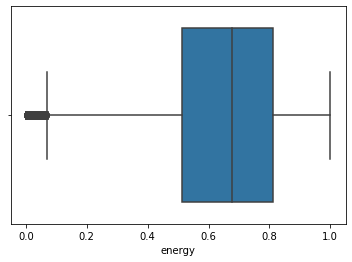

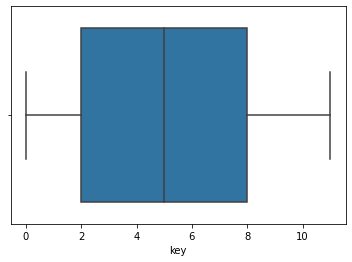

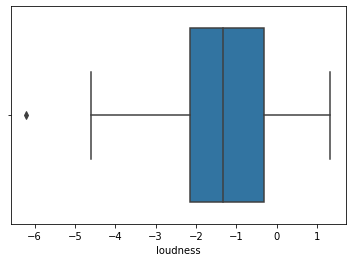

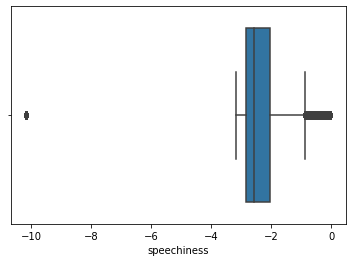

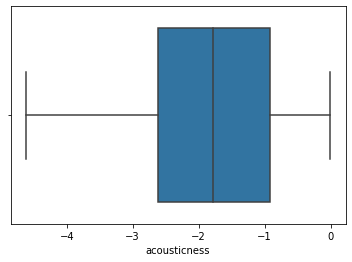

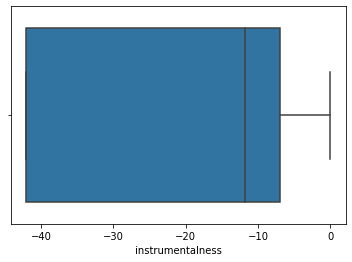

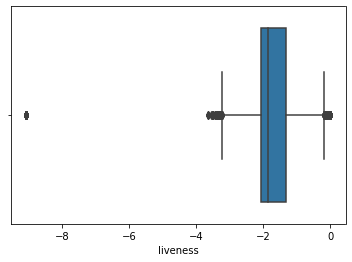

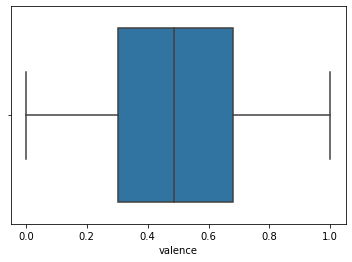

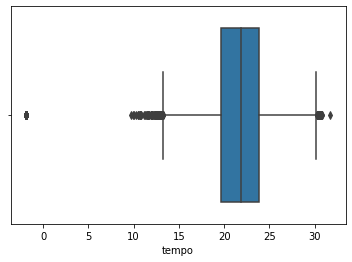

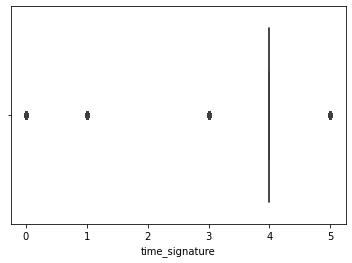

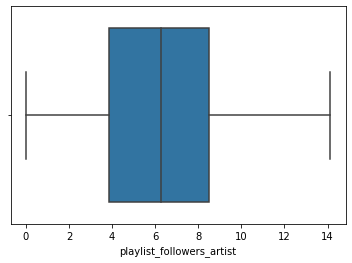

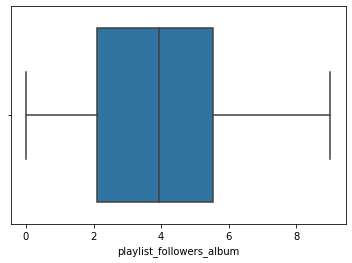

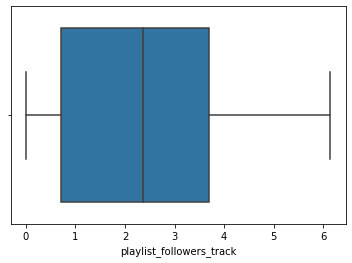

In [27]:
for col in numerical_columns:
    sns.boxplot(df_transformed[col])
    plt.show()

In [28]:
def remove_outliers(df, numericalColumns):
    df1 = df.copy()
    for col in numericalColumns:
        Q1=df1[col].quantile(0.25)
        Q3=df1[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
        df1[col][(df1[col]<lower)]=lower
        df1[col][(df1[col]>upper)]=upper
    return df1

In [29]:
df_transformed = remove_outliers(df_transformed, numerical_columns)
df_transformed

C:\Users\mido9\AppData\Local\Temp\ipykernel_36040\1796915527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][(df1[col]<lower)]=lower
C:\Users\mido9\AppData\Local\Temp\ipykernel_36040\1796915527.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][(df1[col]>upper)]=upper


,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track,mode_no,mode_yes,collaborative_no,collaborative_yes,speech_no,speech_yes,happy_no,happy_yes
0,0,Throwbacks,NaN,1493424000,7.85,9.65,11.61,0.00,1.94,2910.63,-1.36,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.90,0.81,4,NaN,-1.91,-2.44,-4.84,-2.60,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0
1,123,w o r k o u t,NaN,1500681600,16.27,20.89,26.50,0.00,3.78,5821.93,7.38,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.90,0.81,4,NaN,-1.91,-2.44,-4.84,-2.60,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0
2,218,party playlist,NaN,1504310400,11.06,13.66,16.42,0.00,1.47,3813.53,3.65,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.90,0.81,4,NaN,-1.91,-2.44,-4.84,-2.60,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0
3,342,Dance mix,NaN,1473724800,13.37,15.91,21.75,0.00,3.06,5213.54,5.97,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.90,0.81,4,NaN,-1.91,-2.44,-4.84,-2.60,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0
4,382,spin,NaN,1505347200,4.38,4.84,5.26,0.35,1.73,1746.51,0.00,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,111.49,The Cookbook,0.90,0.81,4,NaN,-1.91,-2.44,-4.84,-2.60,0.81,22.41,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,6.64,3.52,3.17,1,0,1,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,3999,other,NaN,1420848000,5.14,10.57,16.33,0.00,2.43,3910.46,5.04,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,112.65,Love Is A Four Letter Word,0.65,0.63,7,NaN,-3.15,-2.22,-42.10,-1.90,0.70,17.78,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,7.93,5.26,0.00,0,1,1,0,1.0,0.0,0.0,1.0
266359,3999,other,NaN,1420848000,5.14,10.57,16.33,0.00,2.43,3910.46,5.61,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,119.51,Galore - The Singles 

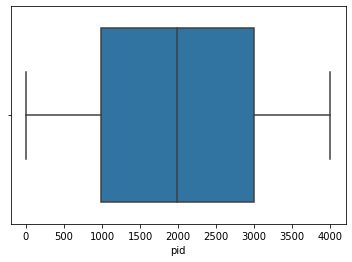

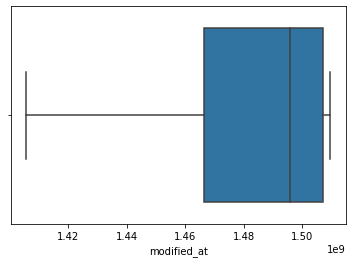

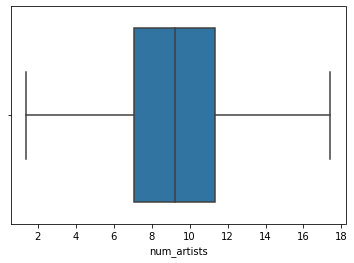

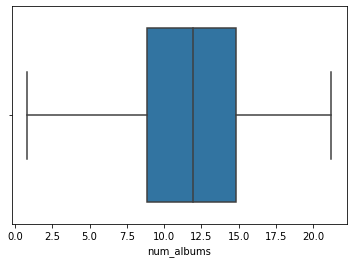

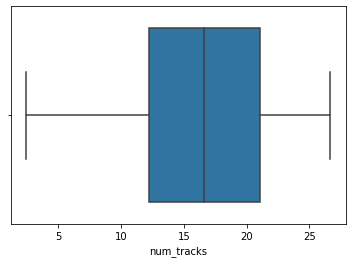

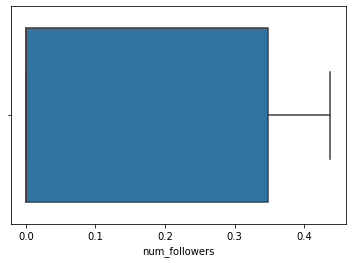

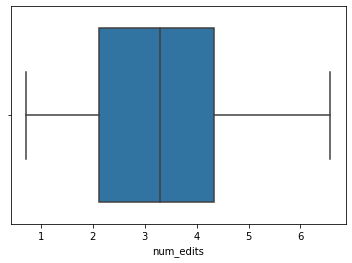

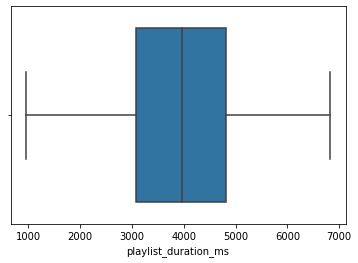

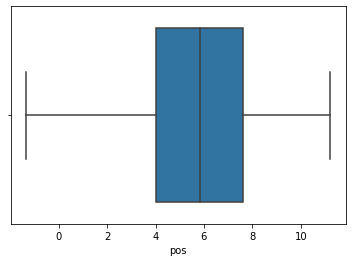

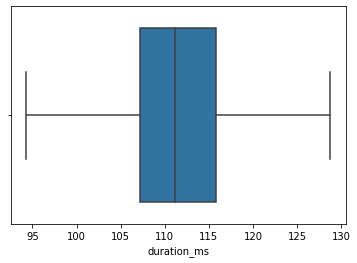

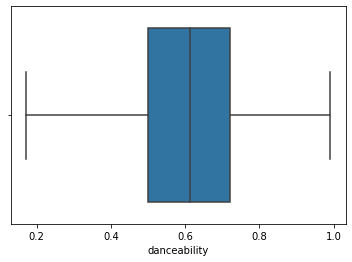

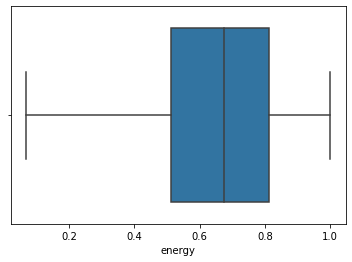

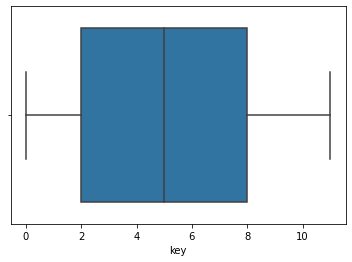

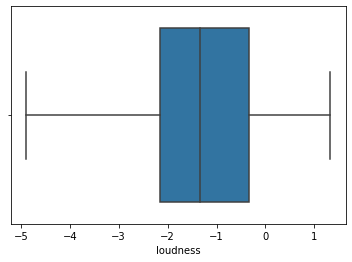

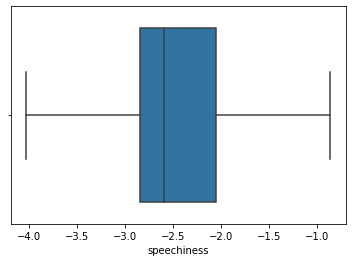

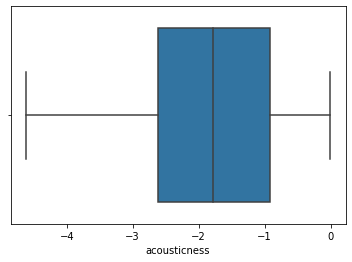

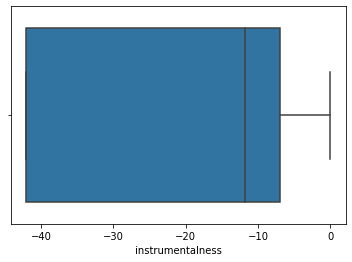

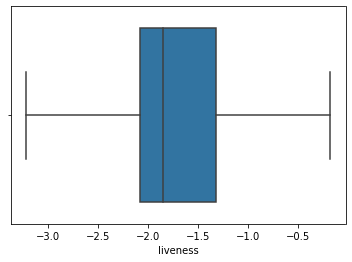

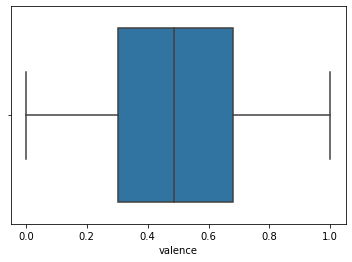

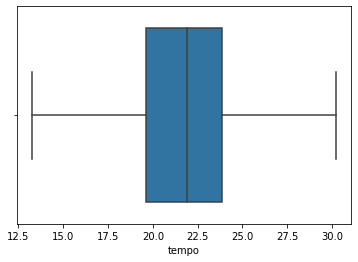

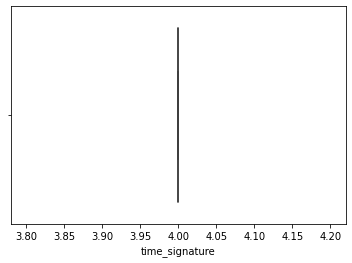

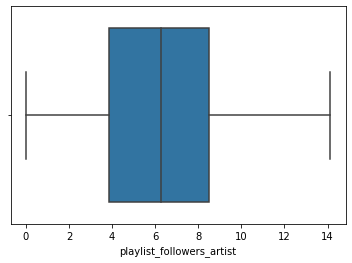

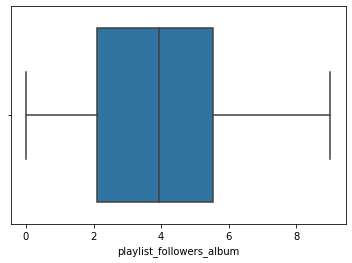

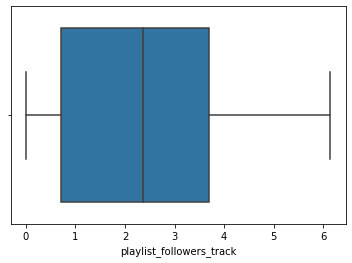

In [30]:
for col in numerical_columns:
    sns.boxplot(df_transformed[col])
    plt.show()

## Feature Scaling

We standardize our data because it is an essential process before checking the correlation or performing PCA

In [31]:
# We will scale our data using standard scaler
scaler = preprocessing.StandardScaler()

# We notice that we exclude the loudness column because if if we try to standardize it, we will get many null values.
positive_numerical_columns = numerical_columns[0:13]+numerical_columns[14:]
df_scaled = pd.DataFrame(scaler.fit_transform(df_transformed[positive_numerical_columns]), columns = df_transformed[positive_numerical_columns].columns)
df_scaled

,pid,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,pos,duration_ms,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,-1.73,0.35,-0.43,-0.54,-0.88,-0.66,-0.95,-0.92,-2.74e+00,-0.02,1.88,0.80,-0.33,0.78,-0.59,1.00,-1.62,1.32,0.19,0.0,0.16,-0.14,0.53
1,-1.62,0.59,2.24,2.27,1.78,-0.66,0.36,1.67,6.56e-01,-0.02,1.88,0.80,-0.33,0.78,-0.59,1.00,-1.62,1.32,0.19,0.0,0.16,-0.14,0.53
2,-1.54,0.71,0.59,0.46,-0.02,-0.66,-1.29,-0.12,-7.96e-01,-0.02,1.88,0.80,-0.33,0.78,-0.59,1.00,-1.62,1.32,0.19,0.0,0.16,-0.14,0.53
3,-1.43,-0.29,1.32,1.02,0.93,-0.66,-0.15,1.13,1.06e-01,-0.02,1.88,0.80,-0.33,0.78,-0.59,1.00,-1.62,1.32,0.19,0.0,0.16,-0.14,0.53
4,-1.40,0.74,-1.53,-1.74,-2.02,1.32,-1.11,-1.96,-2.22e+00,-0.02,1.88,0.80,-0.33,0.78,-0.59,1.00,-1.62,1.32,0.19,0.0,0.16,-0.14,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,1.74,-2.00,-1.29,-0.31,-0.04,-0.66,-0.61,-0.03,-2.54e-01,0.14,0.28,-0.09,0.50,-1.27,-0.39,-1.11,-0.36,0.86,-1.37,0.0,0.57,0.65,-1.45
266359,1.74,-2.00,-1.29,-0.31,-0.04,-0.66,-0.61,-0.03,-3.46e-02,1.09,-0.94,0.47,1.05,-0.91,-1.28,1.02,-0.29,0.58,1.69,0.0,-0.11,-1.75,-1.45
266360,1.74,-2.00,-1.29,-0.31,-0.04,-0.66,-0.61,-0.03,-9.90e-03,0.63,0.67,0.17,1.61,-0.29,-0.35,1.14,-1.24,1.18,-1.03,0.0,-0.11,-1.75,-1.45
266361,1.74,-2.00,-1.29,-0.31,-0.04,-0.66,-0.61,-0.03,3.80e-02,0.38,0.75,0.20,1.05,-0.75,0.24,1.22,-0.93,0.45,-0.97,0.0,-0.11,2.05,0.15


## Label Encoding using SKLearn

We will perform label encoding to `artist_name` and `album_name` assuming they will add us useful information.

In [32]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'artist_name'.
df_scaled['artist_name'] = label_encoder.fit_transform(df_add['artist_name'])
  
# Encode labels in column 'album_name'.
df_scaled['album_name'] = label_encoder.fit_transform(df_add['album_name'])


df_scaled['artist_name'].unique()

array([13184,  2657,  2000, ..., 13736, 10801,   185])

## Drop Useless Features

In [33]:
df_scaled.nunique()

pid                           4000
modified_at                    980
num_artists                    164
num_albums                     200
num_tracks                     241
num_followers                   30
num_edits                      124
playlist_duration_ms          4000
pos                            248
duration_ms                  36538
danceability                   817
energy                        1174
key                             12
speechiness                   1084
acousticness                  4601
instrumentalness              5373
liveness                      1534
valence                       1646
tempo                        49289
time_signature                   1
playlist_followers_artist      368
playlist_followers_album       258
playlist_followers_track       145
artist_name                  22050
album_name                   41545
dtype: int64

In [34]:
# Initially we will drop pid as it adds no useful info, and time_sig because it has only one value
df_scaled = df_scaled.drop(columns = ["pid", "time_signature"], axis = 1)

# Again we concat our scaled data with the boolean ones
df_final = pd.concat([df_scaled, mode_no, mode_yes, collaborative_no, collaborative_yes, speech_no, speech_yes, happy_no, happy_yes], axis=1)


## Checking Correlation

We are checking correlation to get the most useful features by VALUE

<AxesSubplot:>

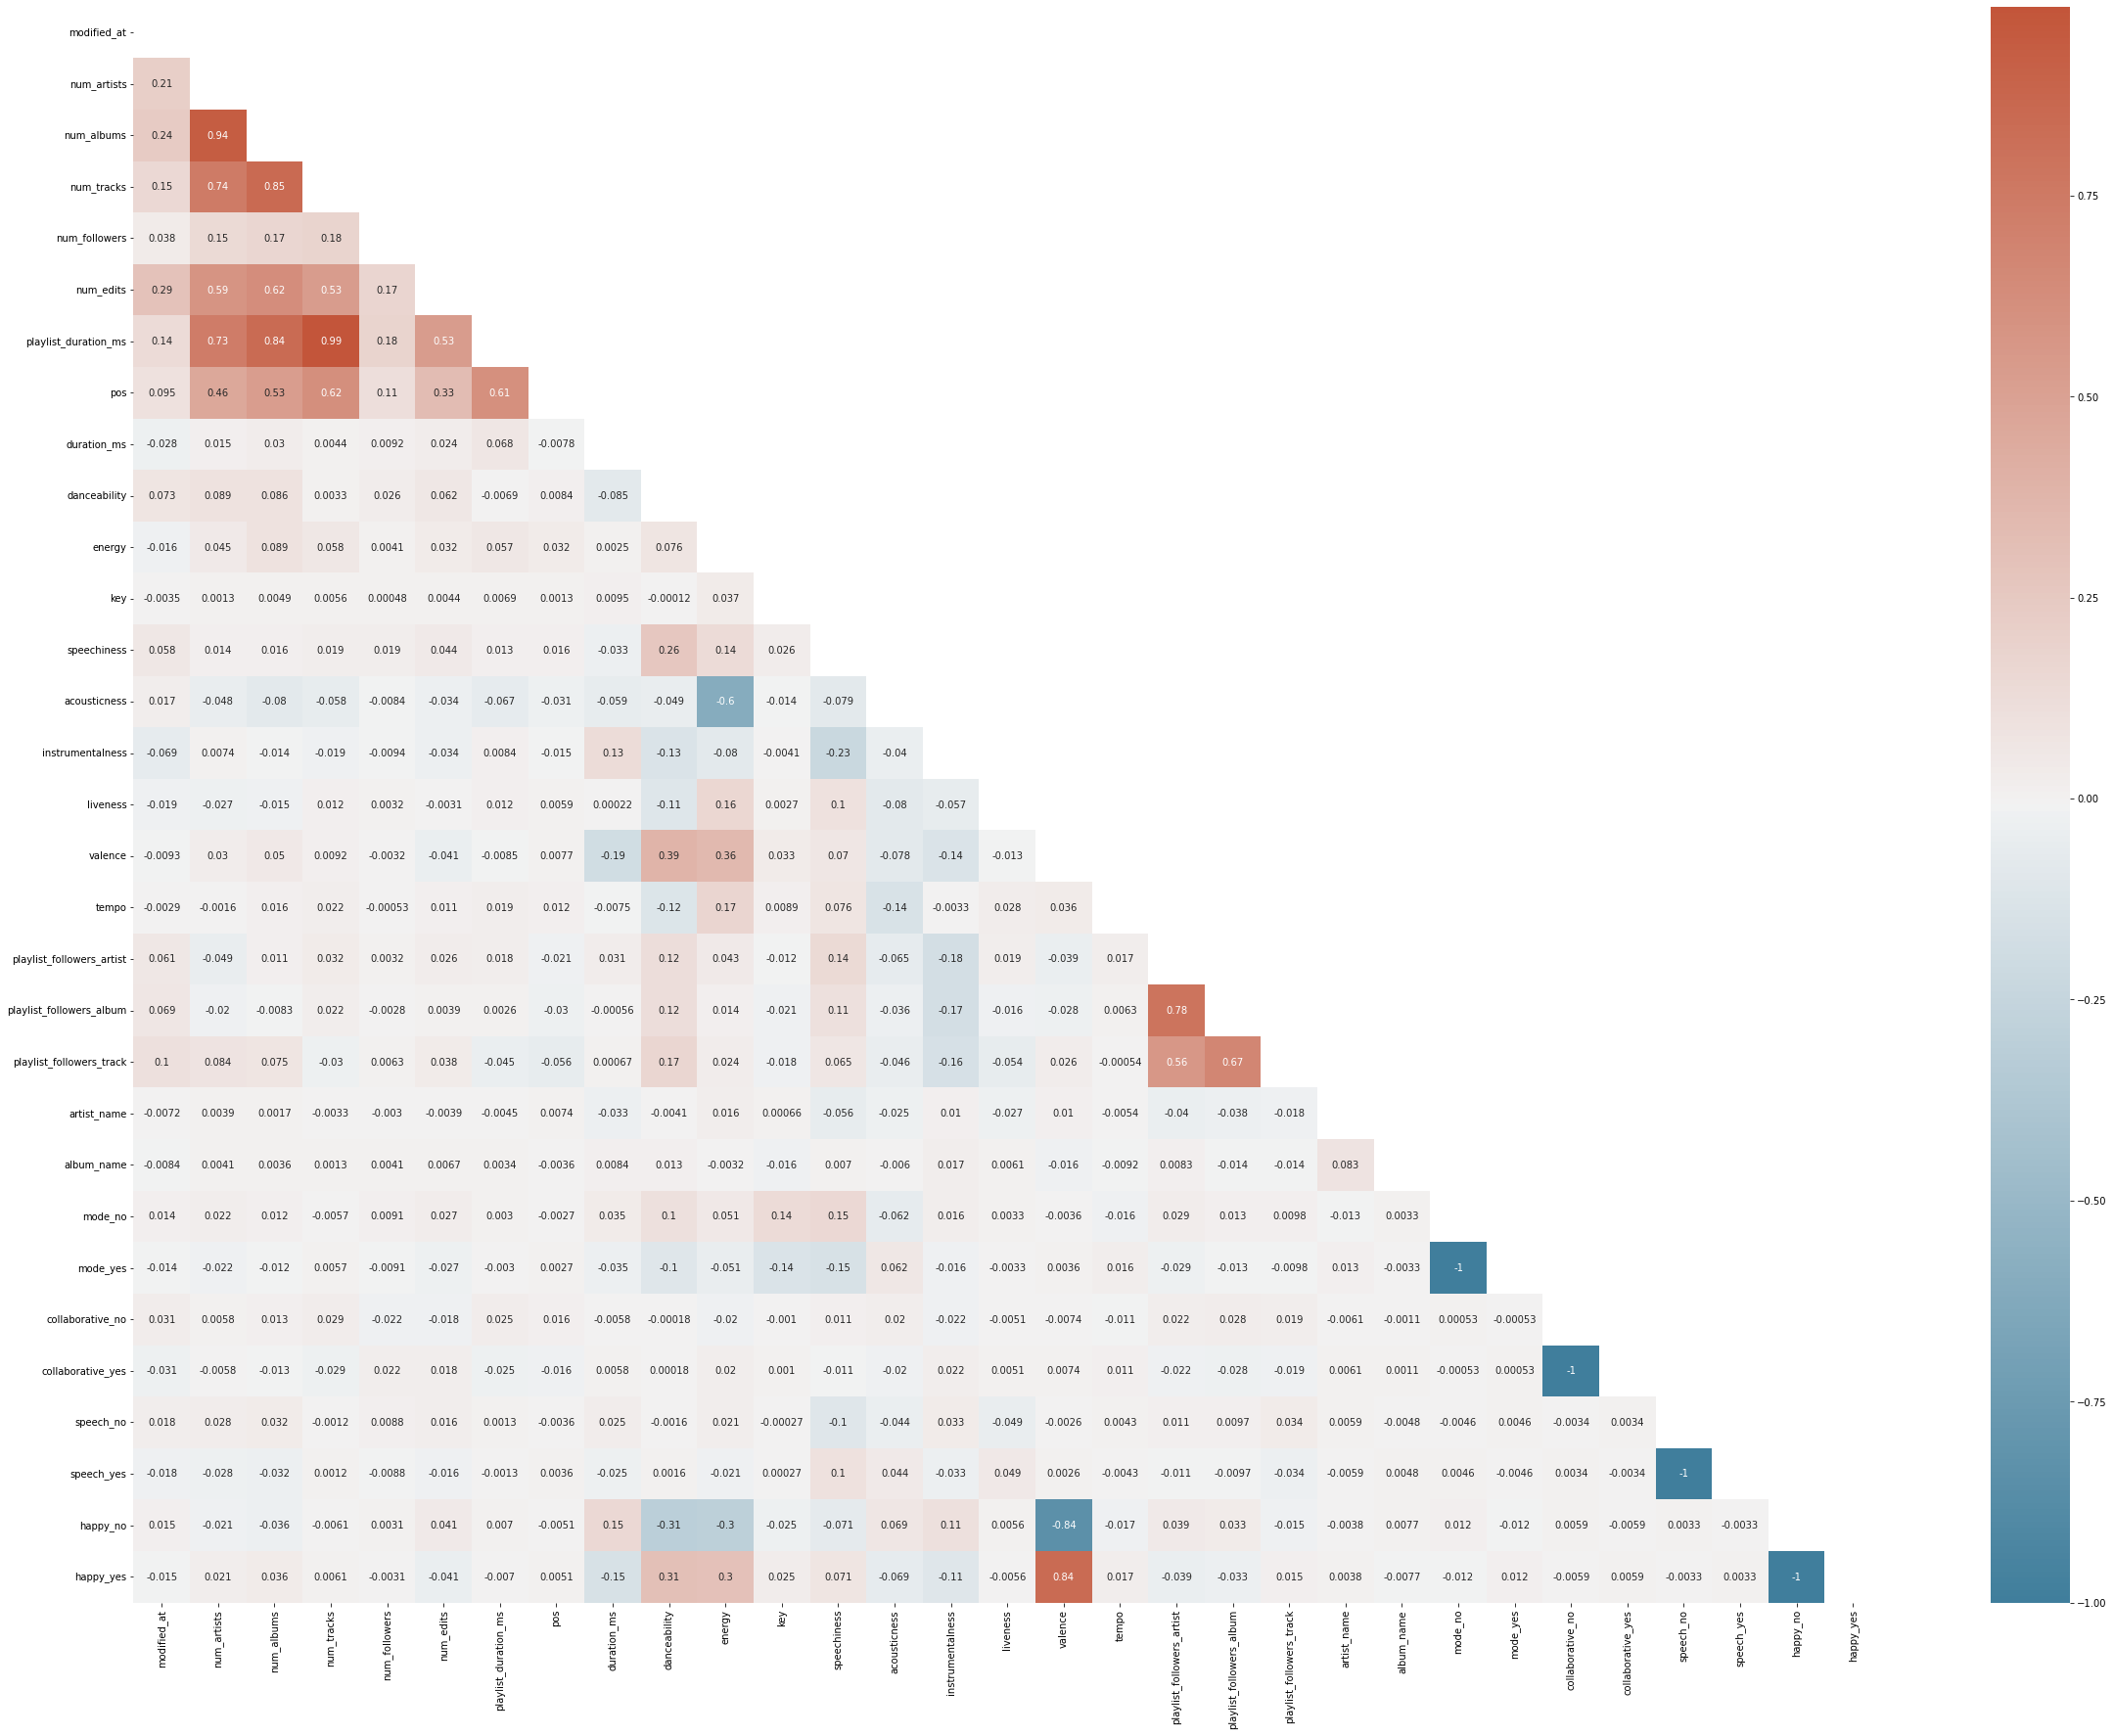

In [35]:
corr = df_final.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(40, 30))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [36]:
# A function to select the best features by checking their correlation. 
def manualFeatureSelection(features, r=0.1): 
    corrColumns = set()  # Set of all the names of correlated columns
    corr_matrix = features.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > r:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                corrColumns.add(colname)
    return list(corrColumns)

In [37]:
best_features = manualFeatureSelection(df_final)
df_best = df_final[best_features]
df_best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266363 entries, 0 to 266362
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   playlist_duration_ms       266363 non-null  float64
 1   mode_yes                   266363 non-null  int64  
 2   num_edits                  266363 non-null  float64
 3   collaborative_yes          266363 non-null  int64  
 4   instrumentalness           266363 non-null  float64
 5   playlist_followers_artist  266363 non-null  float64
 6   speech_no                  266363 non-null  float64
 7   acousticness               266363 non-null  float64
 8   num_albums                 266363 non-null  float64
 9   liveness                   266363 non-null  float64
 10  playlist_followers_track   266363 non-null  float64
 11  happy_yes                  266363 non-null  float64
 12  playlist_followers_album   266363 non-null  float64
 13  valence                    26

## Use PCA for Dimensionality Reduction

We are performing PCA to reduce our vector space and get the most useful NEW features

The cumulative variance of the first two principal components is 0.93715


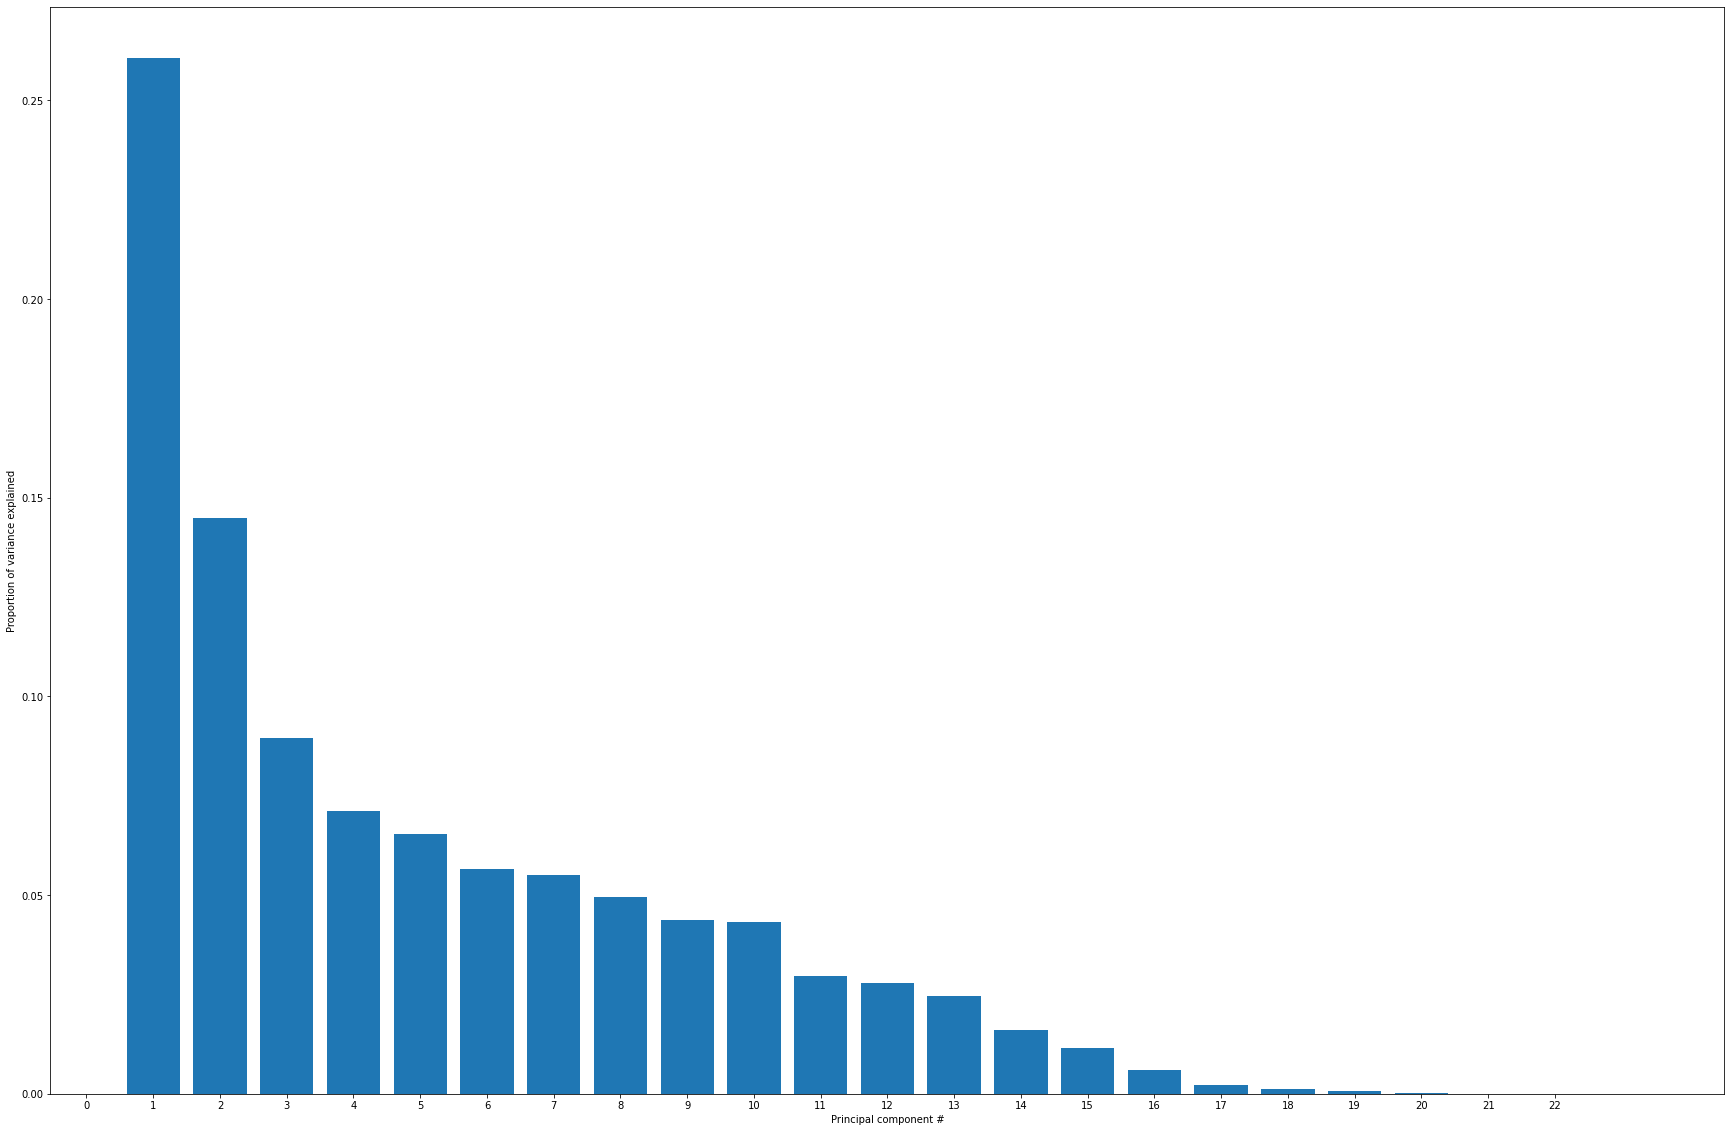

In [38]:
# Perform PCA to make dimensionality reduction 
pca = PCA()

# Fit the standardized data to the pca
pca=pca.fit(df_best)

# Plot the proportion of variance explained on the y-axis of the bar plot
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(30, 20))
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks(range(df_best.shape[1]))

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[11]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

We notice that by reducing our features from 22 to 11 we get 93.7% of the variability of our data.

In [39]:
pca = PCA(n_components = 11)
X_pca = pca.fit_transform(df_best)
X_pca

array([[ 2.43402278,  0.38649161, -1.2410471 , ..., -1.10721944,
        -1.14438144,  0.97063078],
       [-3.80832858,  0.1970772 , -1.13804274, ...,  0.01365854,
        -1.17570686,  0.98075183],
       [ 0.30242311,  0.2770892 , -1.25120382, ...,  0.129864  ,
        -1.12624664,  1.32214272],
       ...,
       [ 1.01266347, -2.11564922, -0.83209738, ...,  1.09495535,
        -0.24939927, -0.65461215],
       [ 1.00708428,  0.78038795,  0.41236225, ...,  1.05453995,
        -0.58653326, -0.41800759],
       [ 0.78924422,  0.36059755,  1.00717817, ...,  1.32256676,
         1.02467538, -0.17854013]])

In [40]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=component_names)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,2.43,3.86e-01,-1.24,-0.93,-1.48,0.27,-0.82,1.62,-1.11,-1.14,0.97
1,-3.81,1.97e-01,-1.14,-1.10,-1.45,-0.65,-0.96,1.34,0.01,-1.18,0.98
2,0.30,2.77e-01,-1.25,-1.01,-1.50,-0.21,-0.84,1.38,0.13,-1.13,1.32
3,-1.90,2.26e-01,-1.17,-1.01,-1.44,-0.43,-0.91,1.33,0.18,-1.14,0.81
4,4.06,3.94e-01,-1.25,-0.75,-1.15,2.33,-0.36,1.41,-0.32,-1.02,0.19
...,...,...,...,...,...,...,...,...,...,...,...
266358,1.08,-8.86e-03,-0.72,-1.34,0.23,-0.80,0.79,0.08,0.97,1.56,-0.82
266359,0.97,-2.07e+00,-1.01,0.67,-2.24,-0.28,-0.39,-0.58,0.71,0.32,-0.59
266360,1.01,-2.12e+00,-0.83,-1.33,-0.74,-0.43,0.16,1.04,1.09,-0.25,-0.65
266361,1.01,7.80e-01,0.41,-1.80,-0.99,-0.57,0.55,0.18,1.05,-0.59,-0.42


## Export our ML Model Data

In [41]:
# This csv file contains the original best features without performing PCA
df_best.to_csv(os.path.join(DATASETS_PATH, 'model_normal_dataset.csv'), index=False)

# This csv file contains the NEWLY CREATED best features by performing PCA
df_pca.to_csv(os.path.join(DATASETS_PATH, 'model_pca_dataset.csv'), index=False)